**Setup and Data collections**

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mv: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 60.9MB/s]


In [ ]:
!unzip /content/sms-spam-collection-dataset.zip

Archive:  /content/sms-spam-collection-dataset.zip
  inflating: spam.csv                


In [ ]:
!pip install flask
!pip install pyngrok

In [ ]:
from flask import Flask, request, render_template_string
from pyngrok import ngrok
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
df=pd.read_csv("spam.csv", encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [ ]:
#checking for missing values
df.isnull().sum()

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


**Dropping uninque-value and repeared coulumns**


In [ ]:
# Dropping the unnecessary columns
df = df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], errors='ignore')
df=df.dropna()
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df_cleaned=['label','message']+ list(df.columns[2:])
df.columns=df_cleaned
df

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


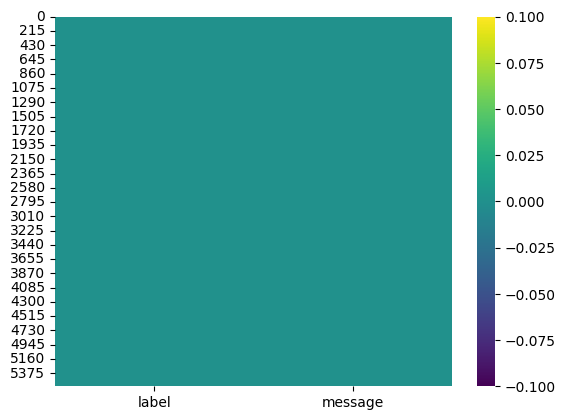

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
sns.heatmap(df.isnull(), cmap='viridis')
plt.show()
df
#so no missing data

In [ ]:
# Encoding the labels (spam = 1, ham = 0)
from sklearn.preprocessing import LabelEncoder # import the LabelEncoder class
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

0    111
1     29
2    155
3     49
4     61
Name: message_length, dtype: int64
5572
      label                                            message  message_length
53        0  Wow. I never realized that you were so embaras...             291
126       0  Just so that you know,yetunde hasn't sent mone...             244
154       0  You are everywhere dirt, on the floor, the win...             384
333       0  Any chance you might have had with me evaporat...             232
355       0  Thank You for calling.Forgot to say Happy Onam...             202
...     ...                                                ...             ...
5374      0  Do u konw waht is rael FRIENDSHIP Im gving yuo...             212
5451      0  Just sing HU. I think its also important to fi...             251
5515      0  You are a great role model. You are giving so ...             245
5535      0  I know you are thinkin malaria. But relax, chi...             329
5557      0  No. I meant the calculation is th

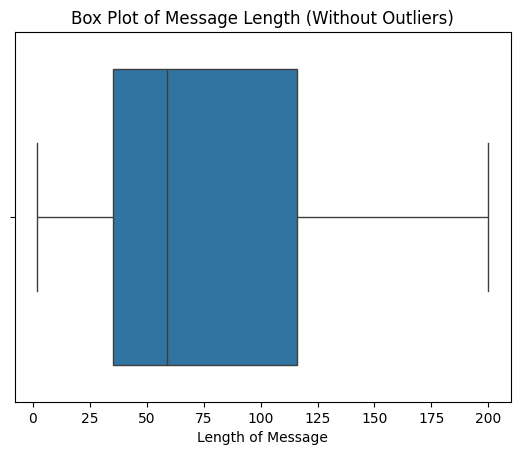

In [ ]:
# Checking for outliers
# To calculate length of message
df['message_length'] = df['message'].apply(len)
print(df['message_length'].head())
print(len(df['message_length']))

# Determine the quartiles
Q1 = df['message_length'].quantile(0.25)
Q3 = df['message_length'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers based on the IQR and a fixed length threshold
fixed_length_threshold = 200
outliers = df[(df['message_length'] < (Q1 - 1.5 * IQR)) | (df['message_length'] > (Q3 + 1.5 * IQR)) | (df['message_length'] > fixed_length_threshold)]
print(outliers)

# Remove outliers
df_cleaned = df[~((df['message_length'] < (Q1 - 1.5 * IQR)) | (df['message_length'] > (Q3 + 1.5 * IQR)) | (df['message_length'] > fixed_length_threshold))]

# Plot the box plot
sns.boxplot(x=df_cleaned['message_length'])
plt.xlabel('Length of Message')
plt.title('Box Plot of Message Length (Without Outliers)')
plt.show()


**Text processing**

In [ ]:
# Text preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
# Convert the text messages into numerical format using TF-IDF
message = TfidfVectorizer(stop_words='english', max_df=0.95)
x = message.fit_transform(df_cleaned['message'])
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove digits from the text
    text = re.sub(r'\d+', '', text)
    # Remove punctuation from the text
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize the text into words
    tokens = nltk.word_tokenize(text)
    # Remove stopwords from the tokens
    tokens = [word for word in tokens if word not in stop_words]
    # Apply stemming to the tokens
    tokens = [stemmer.stem(word) for word in tokens]
    # Apply lemmatization to the tokens
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return ' '.join(tokens)  # Join the tokens back into a single string


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


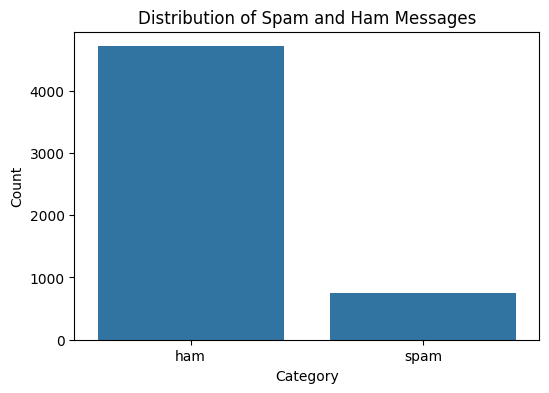

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data = df_cleaned)
plt.title('Distribution of Spam and Ham Messages')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

**Model building**

In [ ]:
x = df['message'] #text
y = df['label']
vectorizer = CountVectorizer()
x = vectorizer.fit_transform(x)
x_train, X_test, y_train, y_test = train_test_split(x , y, test_size=0.2, random_state=39)
nb_model = MultinomialNB()
nb_model.fit(x_train, y_train)
y_pred = nb_model.predict(X_test)
print("Precision:", precision_score(y_test, y_pred, pos_label='spam'))
print("Recall:", recall_score(y_test, y_pred, pos_label='spam'))
print("F1 Score:", f1_score(y_test, y_pred, pos_label='spam'))


Accuracy: 0.9775784753363229
Precision: 0.9329608938547486
Recall: 0.9277777777777778
F1 Score: 0.9303621169916434


In [ ]:
# Target variable
# Use df_cleaned instead of df to ensure consistent number of samples
y = df_cleaned['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


<ipython-input-30-24562b9d802c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['label'] = label_encoder.fit_transform(df_cleaned['label'])


((4368, 7971), (1092, 7971), (4368,), (1092,))

In [ ]:
model = SVC()
model.fit(X_train, y_train)

SVC()

In [ ]:
print('accuracy = ' + str(model.score(X_train, y_train)))

accuracy = 0.9981684981684982


**Model evaluation**

In [ ]:
y_pred = model.predict(X_test)

# Calculate evaluation metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Precision : ", precision)
print("Recall : ", recall)
print("F1-score : ", f1)
print("Confusion Matrix:\n", conf_matrix)

Precision :  0.9915254237288136
Recall :  0.785234899328859
F1-score :  0.8764044943820225
Confusion Matrix:
 [[942   1]
 [ 32 117]]


**Deployment**

In [ ]:
from flask import Flask, render_template, request
import joblib

app = Flask(__name__)

# Load the machine learning model
# Check if the model.pkl file exists.
try:
    model = joblib.load('model.pkl')
except FileNotFoundError:
    # If the file doesn't exist, create a new SVC model and save it.
    model = SVC()
    # Assuming you have X_train and y_train available from previous code
    # Check shapes of X_train and y_train and ensure they have the same number of samples
    print(f"Shape of X_train: {X_train.shape}")
    print(f"Shape of y_train: {y_train.shape}")
    # If the shapes don't match, investigate the cause of the mismatch and fix it
    # ... (Code to fix the mismatch)
    model.fit(x_train, y_train)
    joblib.dump(model, 'model.pkl')
    model = joblib.load('model.pkl')

@app.route('/')
def home():
    return render_template('index.html', prediction='')

@app.route('/predict', methods=['POST'])
def predict():
    # Get input data from the form
    input_data = request.form['input_data']

    # Make predictions using the model
    prediction = model.predict([input_data])[0]

    # Render index.html with the prediction
    return render_template('index.html', prediction=prediction)

if __name__ == '_main_':
   print(app.run(debug=True))